# Bond Cash Flow

In [6]:
import pandas as pd
import datetime as dt

In [7]:
# fv = 100
# issue_date = 15/5/2005
# maturity_date = 15/5/2015
# coupon = 4.125 Semi-Anually

In [8]:
fv = 100
issue_date = dt.datetime(2005, 5, 15)
maturity_date = dt.datetime(2015, 5, 15)
coupon = 4.125
dts = pd.date_range(issue_date, maturity_date, freq='6M')

In [9]:
dts #error doesn't have maturity date

DatetimeIndex(['2005-05-31', '2005-11-30', '2006-05-31', '2006-11-30',
               '2007-05-31', '2007-11-30', '2008-05-31', '2008-11-30',
               '2009-05-31', '2009-11-30', '2010-05-31', '2010-11-30',
               '2011-05-31', '2011-11-30', '2012-05-31', '2012-11-30',
               '2013-05-31', '2013-11-30', '2014-05-31', '2014-11-30'],
              dtype='datetime64[ns]', freq='6M')

In [10]:
dts1 = pd.date_range(issue_date, maturity_date, periods=20) # have maturity date

In [11]:
dts1

DatetimeIndex([          '2005-05-15 00:00:00',
               '2005-11-23 05:03:09.473684210',
               '2006-06-03 10:06:18.947368420',
               '2006-12-12 15:09:28.421052632',
               '2007-06-22 20:12:37.894736840',
               '2008-01-01 01:15:47.368421056',
               '2008-07-11 06:18:56.842105264',
               '2009-01-19 11:22:06.315789472',
               '2009-07-30 16:25:15.789473680',
               '2010-02-07 21:28:25.263157888',
               '2010-08-19 02:31:34.736842112',
               '2011-02-27 07:34:44.210526304',
               '2011-09-07 12:37:53.684210528',
               '2012-03-17 17:41:03.157894720',
               '2012-09-25 22:44:12.631578944',
               '2013-04-06 03:47:22.105263136',
               '2013-10-15 08:50:31.578947360',
               '2014-04-25 13:53:41.052631584',
               '2014-11-03 18:56:50.526315776',
                         '2015-05-15 00:00:00'],
              dtype='datetime64[ns]', f

In [12]:
dates = dts1.strftime('%y-%m-%d')

In [13]:
dates

Index(['05-05-15', '05-11-23', '06-06-03', '06-12-12', '07-06-22', '08-01-01',
       '08-07-11', '09-01-19', '09-07-30', '10-02-07', '10-08-19', '11-02-27',
       '11-09-07', '12-03-17', '12-09-25', '13-04-06', '13-10-15', '14-04-25',
       '14-11-03', '15-05-15'],
      dtype='object')

In [14]:
cash_flow = []
for i in range(len(dates)):
    if i!=0 and i!=(len(dates)-1):
        cash_flow.append((fv*0.04125)/2)
    elif i==0:
        cash_flow.append(-fv)
    else:
        cash_flow.append(fv+(fv*0.04125)/2)

In [15]:
cash_flow

[-100,
 2.0625,
 2.0625,
 2.0625,
 2.0625,
 2.0625,
 2.0625,
 2.0625,
 2.0625,
 2.0625,
 2.0625,
 2.0625,
 2.0625,
 2.0625,
 2.0625,
 2.0625,
 2.0625,
 2.0625,
 2.0625,
 102.0625]

In [16]:
df = pd.DataFrame()
df['Dates'] = dates
df['Cash_flow'] = cash_flow

In [17]:
df

,Dates,Cash_flow
0,05-05-15,-100.0000
1,05-11-23,2.0625
2,06-06-03,2.0625
3,06-12-12,2.0625
4,07-06-22,2.0625
5,08-01-01,2.0625
6,08-07-11,2.0625
7,09-01-19,2.0625
8,09-07-30,2.0625
9,10-02-07,2.0625


# Annuity Cash Flow, Present value, Future value

In [18]:
# rate, N=periods, Ftv=future_value, Freq 

In [19]:
# To Find the present value of amount future_value, to be recieved after N years.
# rate = rate/m if m freq interests compunding annually
# {like investing in bod}
def present_value(rate, N, ftv, freq):
    return ftv/((1+rate/freq)**(N*freq)) # N=N*m and rate = rate/m

def future_value(rate, N, pv, freq):
    return pv*((1+rate/freq)**(N*freq)) 

# If C is invested for N years with rate r(annual) and compounded with freq.
# what is future value {Like Loan}
def future_value_period(rate, freq, N, C):
    return (C/(rate/freq))*((1+rate/freq)**(freq*N)-1)

def present_value_period(rate, freq, N, C):
    return (C/(rate/freq))*(1-1/((1+rate/freq)**(freq*N)))

In [20]:
# example on above formula
# Eg: rate=12%, N=5, PV=100.
future_value(rate=0.12, N=5, pv=100, freq=2)

179.08476965428545

In [21]:
future_value_period(rate=0.12, freq=12, N=2, C=200)

5394.692970638295

In [22]:
# !pip install numpy-financial

In [23]:
import numpy_financial as npf

In [24]:
npf.fv(0.05/12, 10*12, -100, -100)

15692.928894335748

In [25]:
npf.pv(0.05/12, 10*12, -100, 15692)

-99.43601154877993

In [27]:
cashflow_df = pd.read_csv('lab-2-cashflow.csv')

In [28]:
cashflow_df.head(5)

,Product,Year,Cash flows,Interest rate
0,Flood insurance,0,24000,0.025
1,Flood insurance,1,-2000,0.026
2,Flood insurance,2,-2000,0.027
3,Flood insurance,3,-2000,0.028
4,Flood insurance,4,-2000,0.029


In [29]:
cashflow_df['Discount_Factor'] = 1/((1+cashflow_df['Interest rate'])**cashflow_df['Year'])

In [30]:
cashflow_df.head(10)

,Product,Year,Cash flows,Interest rate,Discount_Factor
0,Flood insurance,0,24000,0.025,1.000000
1,Flood insurance,1,-2000,0.026,0.974659
2,Flood insurance,2,-2000,0.027,0.948111
3,Flood insurance,3,-2000,0.028,0.920493
4,Flood insurance,4,-2000,0.029,0.891946
5,Flood insurance,5,-2000,0.030,0.862609
6,Flood insurance,6,-2000,0.031,0.832622
7,Flood insurance,7,-2000,0.032,0.802125
8,Flood insurance,8,-2000,0.033,0.771254
9,Flood insurance,9,-2000,0.034,0.740142


In [31]:
cashflow_df['Present_value'] = cashflow_df['Cash flows']*cashflow_df['Discount_Factor']

In [32]:
cashflow_df.head(10)

,Product,Year,Cash flows,Interest rate,Discount_Factor,Present_value
0,Flood insurance,0,24000,0.025,1.000000,24000.000000
1,Flood insurance,1,-2000,0.026,0.974659,-1949.317739
2,Flood insurance,2,-2000,0.027,0.948111,-1896.221683
3,Flood insurance,3,-2000,0.028,0.920493,-1840.986703
4,Flood insurance,4,-2000,0.029,0.891946,-1783.891748
5,Flood insurance,5,-2000,0.030,0.862609,-1725.217569
6,Flood insurance,6,-2000,0.031,0.832622,-1665.244485
7,Flood insurance,7,-2000,0.032,0.802125,-1604.250246
8,Flood insurance,8,-2000,0.033,0.771254,-1542.507994
9,Flood insurance,9,-2000,0.034,0.740142,-1480.284347


In [33]:
cashflow_aggregate = cashflow_df.groupby("Product")[['Present_value']].sum()

In [34]:
cashflow_aggregate

,Present_value
Product,
Fire insurance,993.107122
Flood insurance,7094.239858


## Internal rate of return

In [35]:
npf.irr([-100, 30, 30, 30, 130])

0.2999999999999998

In [36]:
help(npf.irr)

Help on function irr in module numpy_financial._financial:

irr(values)
    Return the Internal Rate of Return (IRR).
    
    This is the "average" periodically compounded rate of return
    that gives a net present value of 0.0; for a more complete explanation,
    see Notes below.
    
    :class:`decimal.Decimal` type is not supported.
    
    Parameters
    ----------
    values : array_like, shape(N,)
        Input cash flows per time period.  By convention, net "deposits"
        are negative and net "withdrawals" are positive.  Thus, for
        example, at least the first element of `values`, which represents
        the initial investment, will typically be negative.
    
    Returns
    -------
    out : float
        Internal Rate of Return for periodic input values.
    
    Notes
    -----
    The IRR is perhaps best understood through an example (illustrated
    using np.irr in the Examples section below).  Suppose one invests 100
    units and then makes the following 

In [37]:
values = [[-100, 120], [-100, 20, 120], [-100, 30, 30, 120], [-100, 20, 40, 40, 120]]
irr = []
for i in range(len(values)):
    irr.append(npf.irr(values=values[i]))

In [38]:
irr

[0.19999999999999996,
 0.19999999999999996,
 0.274347860605328,
 0.2967167015500347]

In [42]:
# !pip install scipy

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

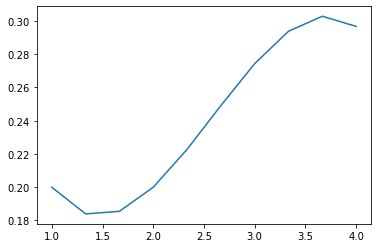

In [44]:
x = np.linspace(1,4,num=10, endpoint=True)
f2 = interp1d([1,2,3,4], irr, kind='cubic')
plt.plot(x, f2(x), '-')

## Yield

In [45]:
# !pip install Quandl

In [46]:
import quandl as ql
yield_ = ql.get("USTREASURY/YIELD")

In [47]:
yield_

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,0.03,0.13,0.22,0.49,0.78,1.18,1.39,1.62,1.75,1.79,2.17,2.11
2022-02-01,0.04,0.10,0.19,0.48,0.78,1.18,1.39,1.63,1.76,1.81,2.19,2.12
2022-02-02,0.04,0.10,0.19,0.45,0.76,1.16,1.38,1.60,1.74,1.78,2.17,2.11


<AxesSubplot:title={'center':'tresury yield curve,%'}>

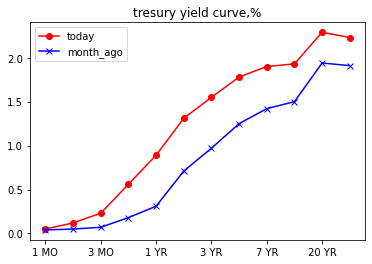

In [48]:
today = yield_.iloc[-1, :]
month_ago = yield_.iloc[-30, :]
df = pd.concat([today, month_ago], axis=1)
df.columns=['today', 'month_ago']
df.plot(style={'today':'ro-', 'month_ago':'bx-'}, title="tresury yield curve,%")